## Explore the UVES files

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from astropy.io import fits

In [2]:
directory = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/SkyEmissionLines/UVES/'
flux580L = 'fluxed_sky_580L.fits' # 4810, 5770
flux564U = 'fluxed_sky_564U.fits' # 5740, 5860
flux580U = 'fluxed_sky_580U.fits' # 5830, 6790

In [3]:
# for flux 580L
fname = directory + flux580L
hdul = fits.open(fname)
hdu = hdul[0]
hdr = hdu.header
fl_L = hdu.data
wl_L = np.linspace(4810, 5770, len(fl_L))

# for flux 564U
fname = directory + flux564U
hdul = fits.open(fname)
hdu = hdul[0]
hdr = hdu.header
fl_M = hdu.data
wl_M = np.linspace(5740, 5860, len(fl_M))
truncated_wl_M = wl_M[(wl_M > 5770) & (wl_M < 5830)]
truncated_fl_M = fl_M[(wl_M > 5770) & (wl_M < 5830)]

# for flux 580U
fname = directory + flux580U
hdul = fits.open(fname)
hdu = hdul[0]
hdr = hdu.header
fl_U = hdu.data
wl_U = np.linspace(5830, 6790, len(fl_U))

# total spectrum
wl = np.concatenate((wl_L, truncated_wl_M, wl_U),axis=0)
fl = np.concatenate((fl_L, truncated_fl_M, fl_U),axis=0)

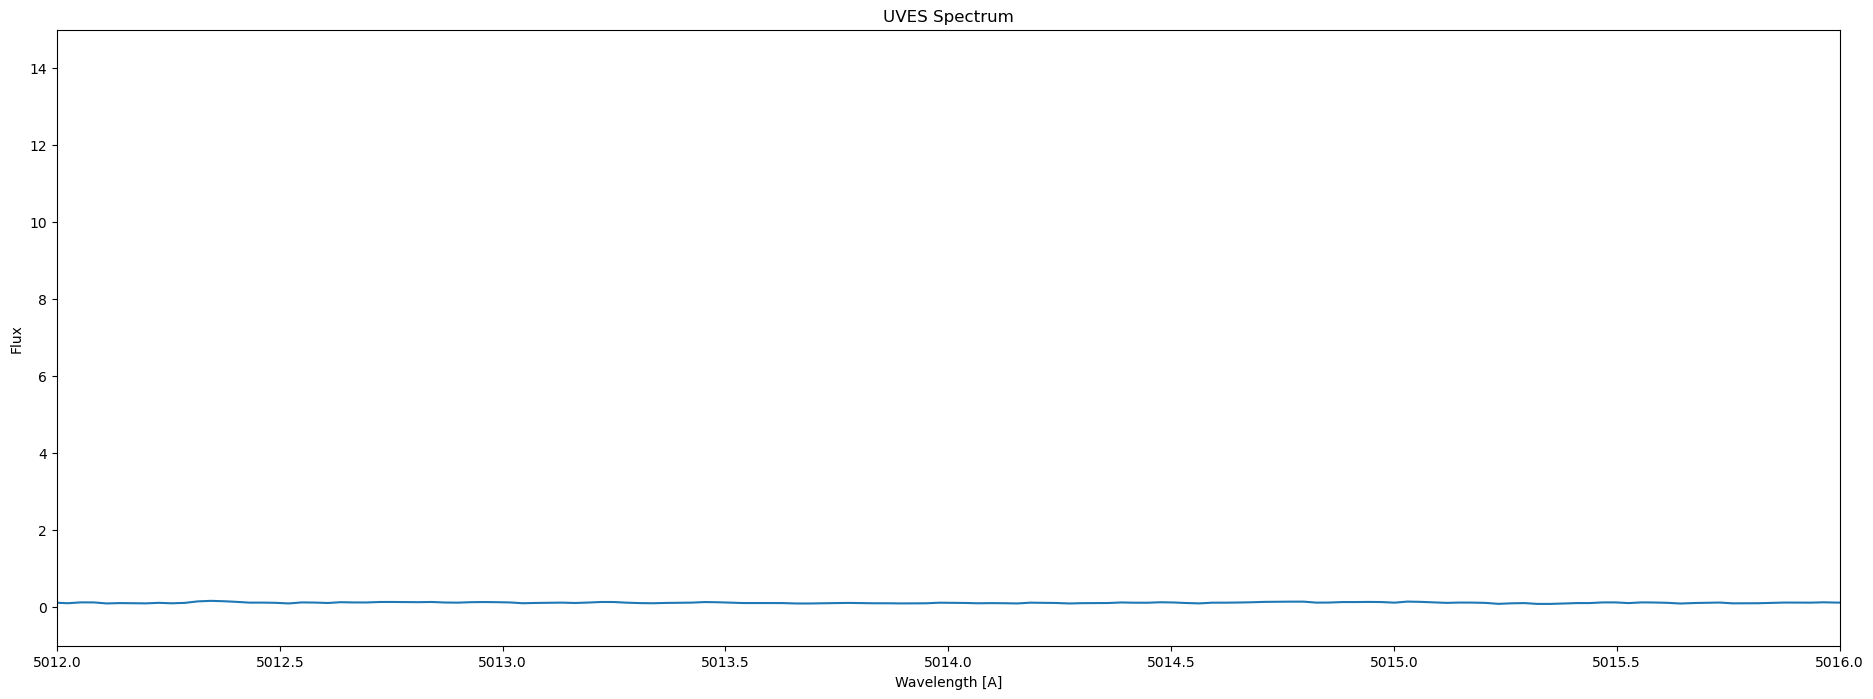

In [10]:
plt.rcParams["figure.figsize"] = (23,8)
plt.plot(wl, fl)
plt.xlim(5000, 6400)
plt.xlabel('Wavelength [A]')

plt.xlim(5012, 5016)
plt.ylim(-1, 15)
plt.ylabel('Flux')
plt.title('UVES Spectrum')
plt.show()

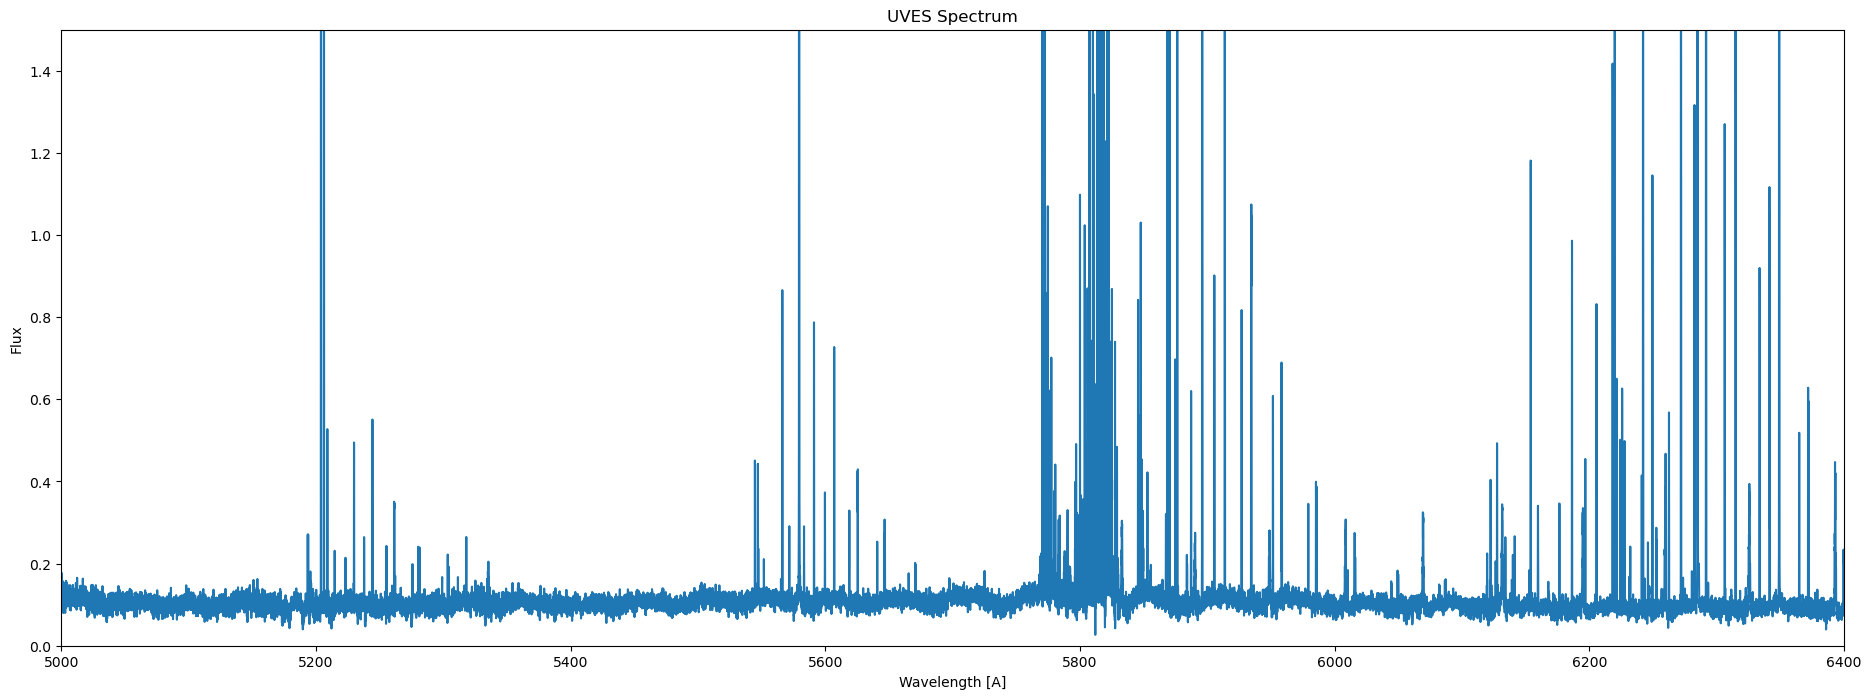

In [77]:
plt.rcParams["figure.figsize"] = (23,8)
plt.plot(wl, fl)
plt.xlim(5000, 6400)
plt.ylim(0, 1.5)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('UVES Spectrum')
plt.show()

In [78]:
threshold = 0.5

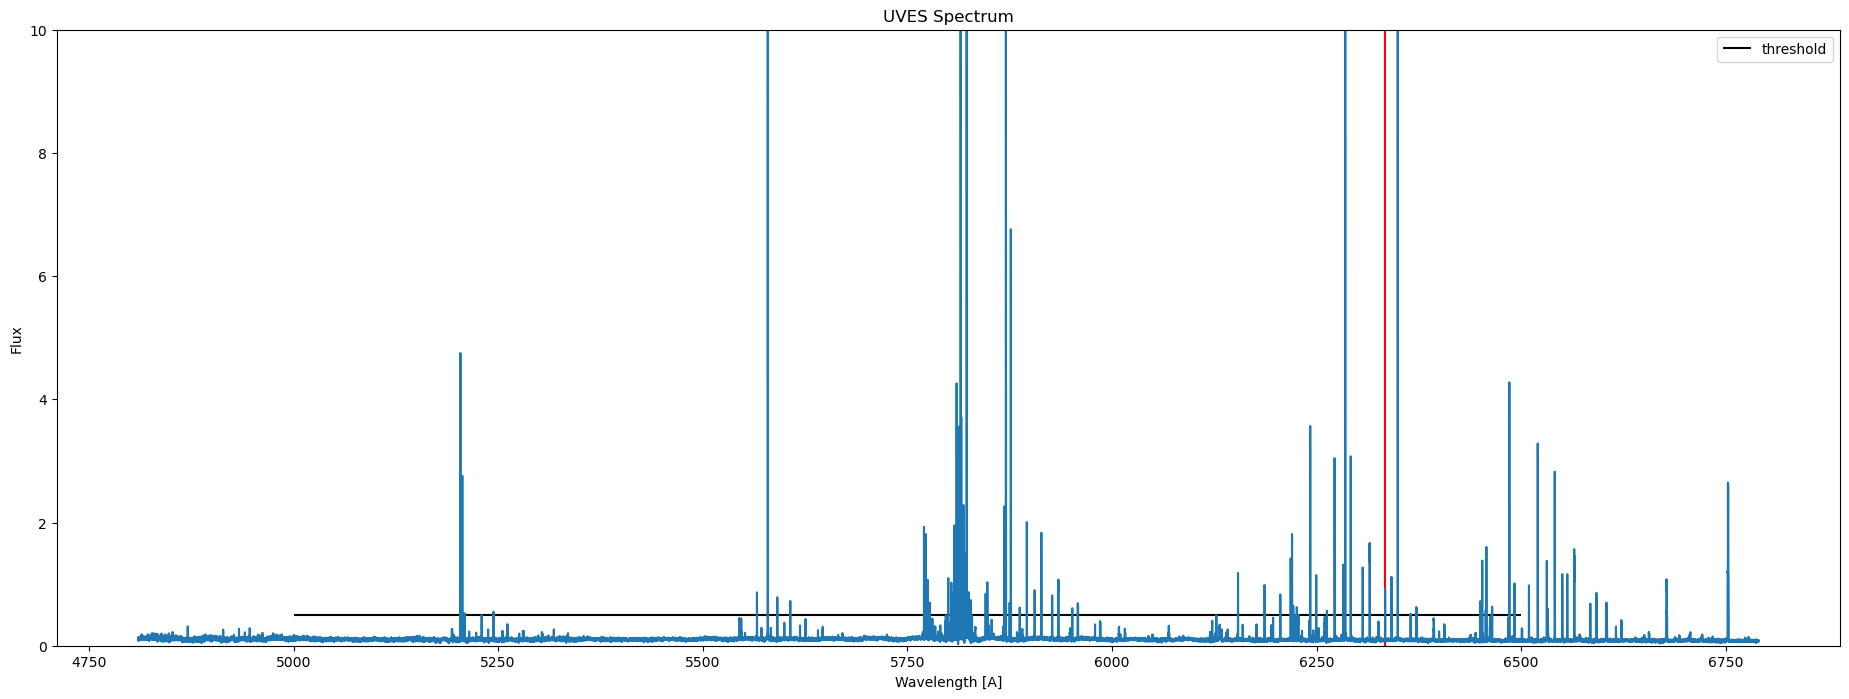

In [79]:
plt.plot(wl, fl)
plt.hlines(y=threshold, xmin=5000, xmax=6500, label='threshold')
plt.vlines(x = 6333.839020635561, ymin= 0, ymax=10, color = 'red')
plt.ylim(0, 10)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.title('UVES Spectrum')
plt.show()

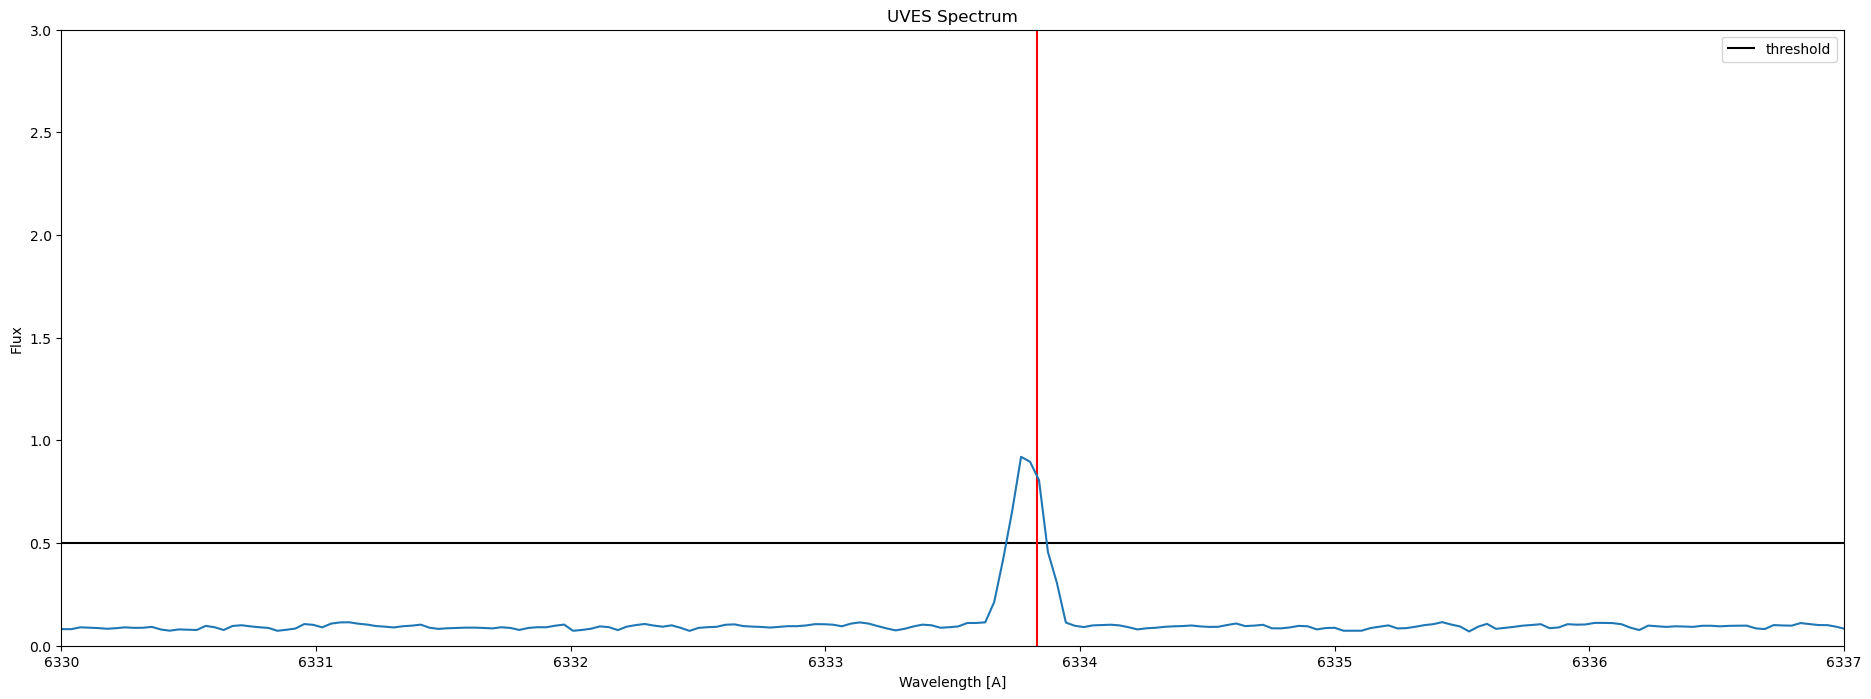

In [80]:
plt.plot(wl, fl)
plt.hlines(y=threshold, xmin=5000, xmax=6500, label='threshold')
plt.vlines(x = 6333.830519350277, ymin= 0, ymax=10, color = 'red')
plt.ylim(0, 3)
plt.xlim(6330, 6337)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.legend()
plt.title('UVES Spectrum')
plt.show()

In [81]:
wl_emission_lines = wl[fl>threshold]

len(wl_emission_lines)

711

In [61]:
file_name = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/SkyEmissionLines/emission_wls'

In [62]:
np.save(file_name, wl_emission_lines)

In [6]:
unbinned_spectrum = pd.DataFrame({'wl': wl, 'fl': fl})
binned_spectrum = unbinned_spectrum.groupby(unbinned_spectrum.index // 1).mean()

In [7]:
binned_wl = binned_spectrum['wl']
binned_fl = binned_spectrum['fl']

In [12]:
lst = list(binned_wl[(binned_wl < 5001) & (binned_wl > 5000)])
wl_range = lst[1] - lst[0]
print('UVES Spectrum 1 pixel @5000A = ' + str(wl_range))
print('APF Spectrum 1 pixel @5000A = 0.0169')

UVES Spectrum 1 pixel @5000A = 0.029189978107751813
APF Spectrum 1 pixel @5000A = 0.0169


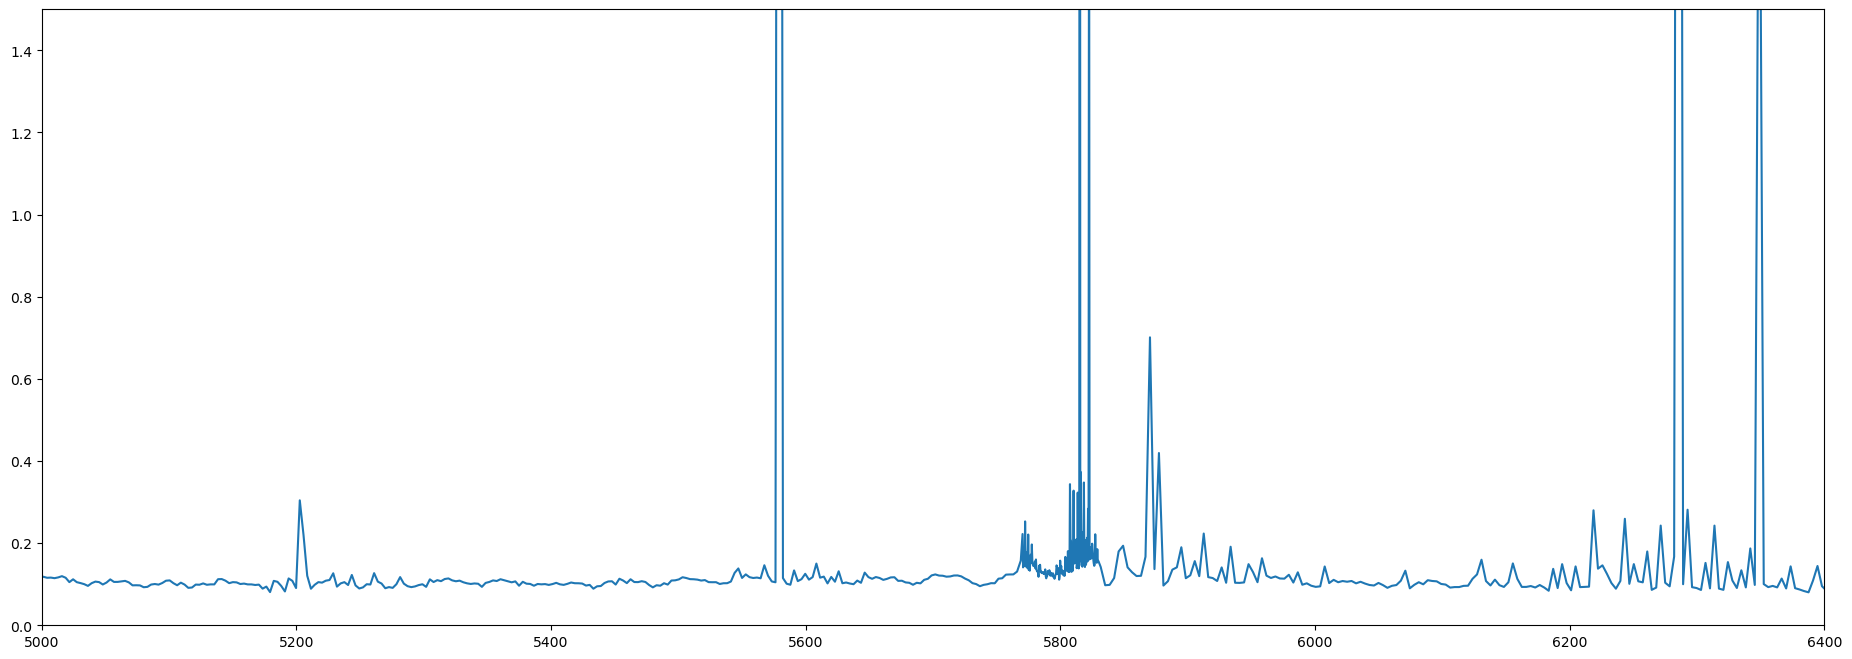

In [39]:
plt.plot(binned_wl, binned_fl)
plt.xlim(5000, 6400)
plt.ylim(0, 1.5)
plt.show()

At 5000 A, one pixel = 0.01696052432362194 A.